In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-kerala-dataset/covid-19_Kerala_Data23rdMarch.csv
/kaggle/input/lastdata/covidprosker.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

['__notebook_source__.ipynb']


In [5]:

data = pd.read_csv("/kaggle/input/lastdata/covidprosker.csv")

In [6]:
data.drop(["District"], axis = 1, inplace = True) 

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.shape

(87, 7)

In [9]:
data.head()

,Traveledabroad,Status,Age,Gender,Origin,Travelledtemperature,LastvisitedCountytemp
0,1,2,20,0,1,23,13
1,1,2,21,0,1,23,13
2,1,2,20,0,1,23,13
3,1,1,24,1,1,23,17
4,1,1,53,0,1,23,17


In [10]:
data.describe()

,Traveledabroad,Status,Age,Gender,Origin,Travelledtemperature,LastvisitedCountytemp
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.563218,0.666667,33.954023,0.632184,0.712644,26.758621,27.919540
std,0.498863,0.542746,15.978844,0.485006,0.608239,4.427623,6.782704
min,0.000000,0.000000,3.000000,0.000000,0.000000,23.000000,13.000000
25%,0.000000,0.000000,23.000000,0.000000,0.000000,23.000000,26.000000
50%,1.000000,1.000000,27.000000,1.000000,1.000000,23.000000,26.000000
75%,1.000000,1.000000,41.000000,1.000000,1.000000,32.000000,35.000000
max,1.000000,2.000000,96.000000,1.000000,2.000000,34.000000,35.000000


In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
Traveledabroad           87 non-null int64
Status                   87 non-null int64
Age                      87 non-null int64
Gender                   87 non-null int64
Origin                   87 non-null int64
Travelledtemperature     87 non-null int64
LastvisitedCountytemp    87 non-null int64
dtypes: int64(7)
memory usage: 4.9 KB


In [12]:
data.sample(5)

,Traveledabroad,Status,Age,Gender,Origin,Travelledtemperature,LastvisitedCountytemp
59,0,0,24,0,0,32,35
74,0,0,27,1,0,32,35
22,1,1,24,1,1,23,26
57,0,0,27,1,0,32,35
84,0,0,30,0,0,32,35


In [13]:
data.isnull().sum()

Traveledabroad           0
Status                   0
Age                      0
Gender                   0
Origin                   0
Travelledtemperature     0
LastvisitedCountytemp    0
dtype: int64

In [14]:
data.isnull().sum().sum()

0

In [15]:
print(data.corr()["Status"].abs().sort_values(ascending=False))

Status                   1.000000
LastvisitedCountytemp    0.850730
Travelledtemperature     0.841944
Origin                   0.833619
Traveledabroad           0.830291
Age                      0.326705
Gender                   0.294487
Name: Status, dtype: float64


In [16]:
y=data["Status"]

1    52
0    32
2     3
Name: Status, dtype: int64


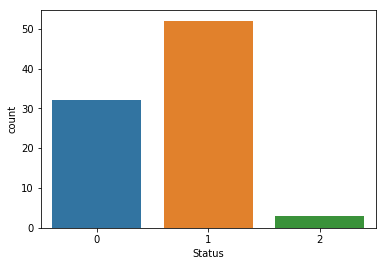

In [17]:
ax=sns.countplot(data["Status"])
target_temp = data.Status.value_counts()
print(target_temp)

1    52
0    32
2     3
Name: Status, dtype: int64


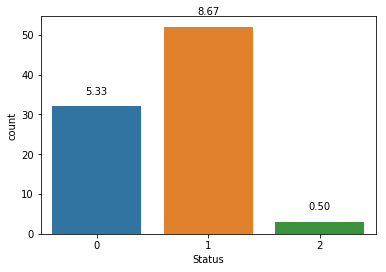

In [18]:
#total = float(len(Status))
from matplotlib.pyplot import show
ax=sns.countplot(data["Status"])
target_temp=data.Status.value_counts()
total = float(len("Status"))
print(target_temp)
#for showing the percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

In [19]:
print("Percentage of Patients without Corona:"+str(round(target_temp[0]*100/88,3)))
print("Percentage of Patients with Corona:"+str(round(target_temp[1]*100/88,3)))
print("Percentage of Corona Patients recoverd:"+str(round(target_temp[2]*100/88,3)))

Percentage of Patients without Corona:36.364
Percentage of Patients with Corona:59.091
Percentage of Corona Patients recoverd:3.409


In [20]:

data["Gender"].unique()

array([0, 1])

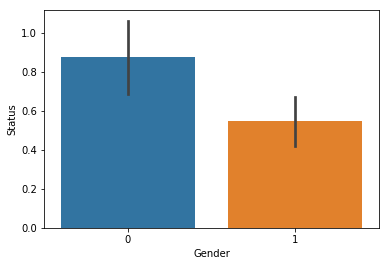

In [21]:
sns.barplot(data["Gender"],data["Status"])

AttributeError: module 'seaborn' has no attribute 'show'

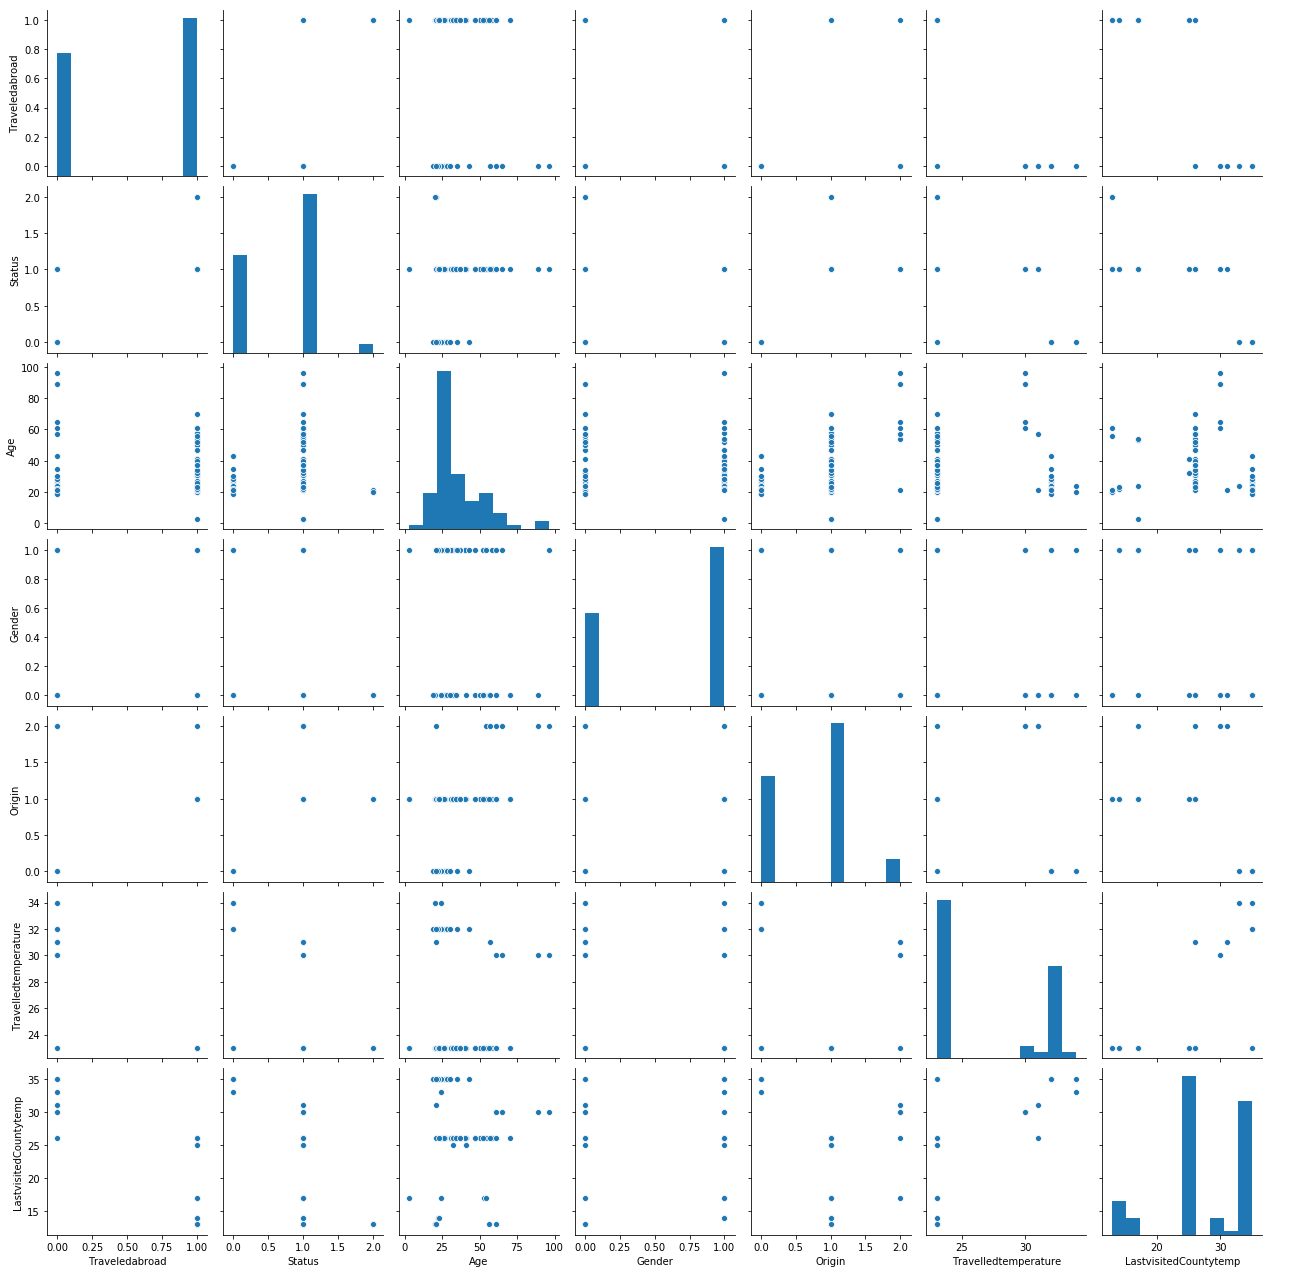

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(data)
sns.show()
    

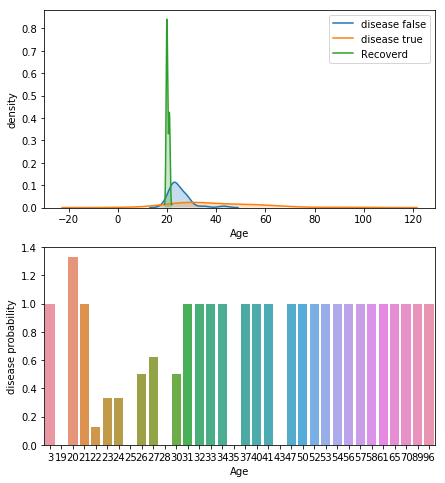

<Figure size 216x216 with 0 Axes>

In [23]:

        
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='Status')
    facet_grid.map(sns.kdeplot, "Age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true','Recoverd' ]
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='Age', ylabel='density')

    avg = data[["Age", "Status"]].groupby(['Age'], as_index=False).mean()
    sns.barplot(x='Age', y='Status', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='disease probability')

    plt.clf()
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))

plotAge()

In [24]:

countFemale = len(data[data.Gender == 0])
countMale = len(data[data.Gender == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.Gender))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.Gender))*100))

Percentage of Female Patients:36.78%
Percentage of Male Patients:63.22%


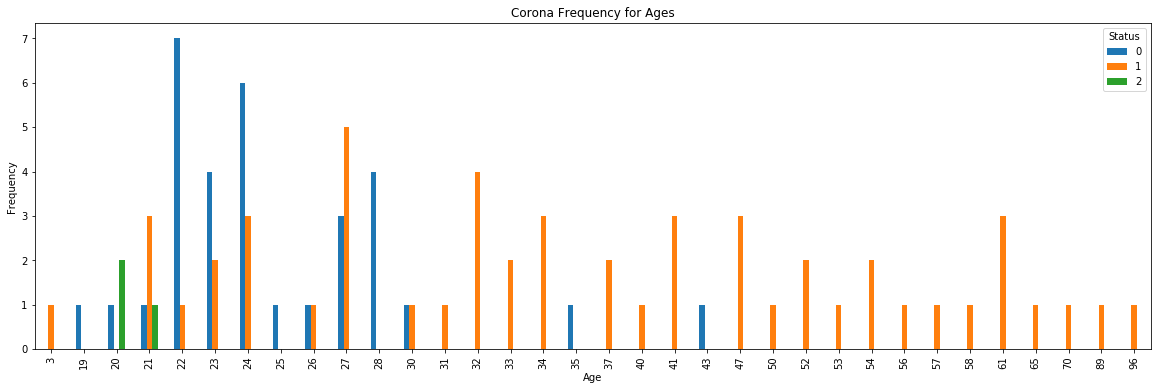

In [25]:
pd.crosstab(data.Age,data.Status).plot(kind="bar",figsize=(20,6))
plt.title('Corona Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
pd.crosstab(data.Gender,data.Status).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Corona Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [26]:

data.head()

,Traveledabroad,Status,Age,Gender,Origin,Travelledtemperature,LastvisitedCountytemp
0,1,2,20,0,1,23,13
1,1,2,21,0,1,23,13
2,1,2,20,0,1,23,13
3,1,1,24,1,1,23,17
4,1,1,53,0,1,23,17


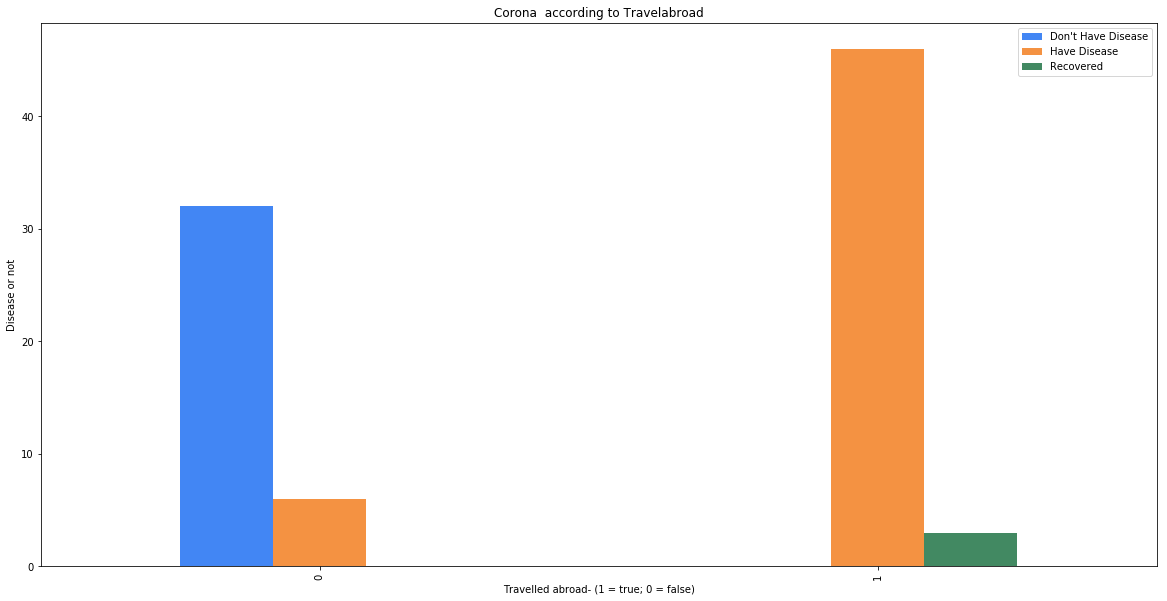

In [27]:

pd.crosstab(data.Traveledabroad,data.Status).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242','#428962'])
plt.title("Corona  according to Travelabroad")
plt.xlabel('Travelled abroad- (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease", "Recovered"])
plt.ylabel('Disease or not')
plt.show()

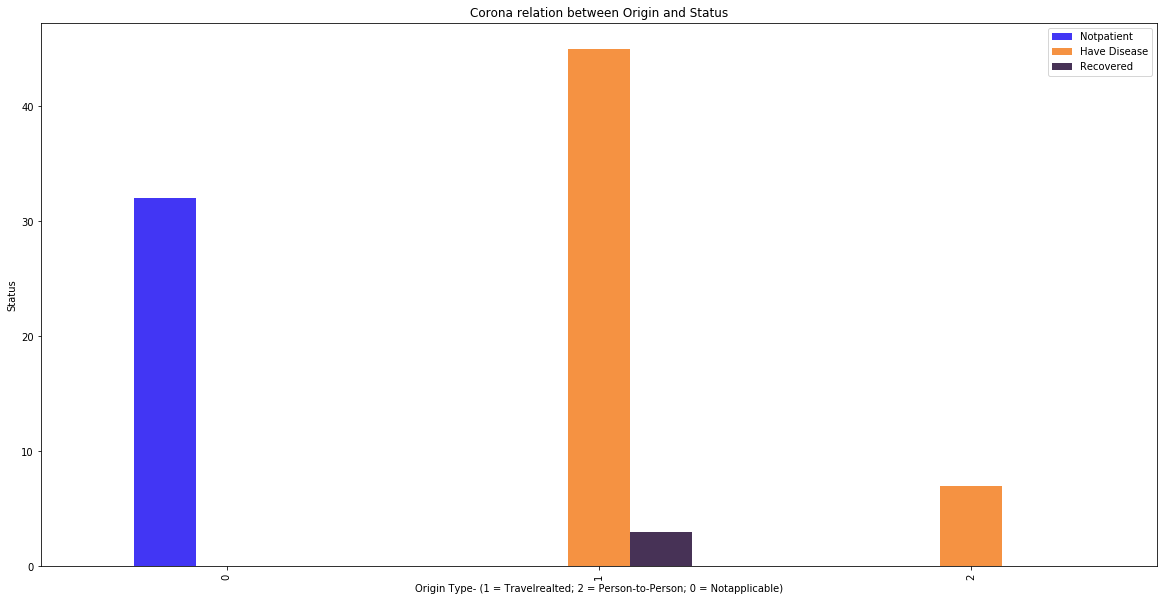

In [28]:

pd.crosstab(data.Origin,data.Status).plot(kind="bar",figsize=(20,10),color=['#4236f4','#f59242', '#473256'])
plt.title("Corona relation between Origin and Status")
plt.xlabel('Origin Type- (1 = Travelrealted; 2 = Person-to-Person; 0 = Notapplicable)')
plt.xticks(rotation=90)
plt.legend(["Notpatient", "Have Disease", "Recovered"])
plt.ylabel('Status')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2414454160>,
      dtype=object)

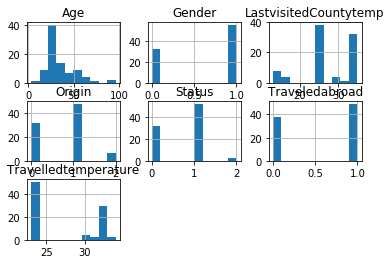

In [29]:
data.hist()

In [30]:
# store numeric variables in cnames
cnames=['LastvisitedCountytemp','Origin','Status','Traveledabroad', 'Travelledtemperature']

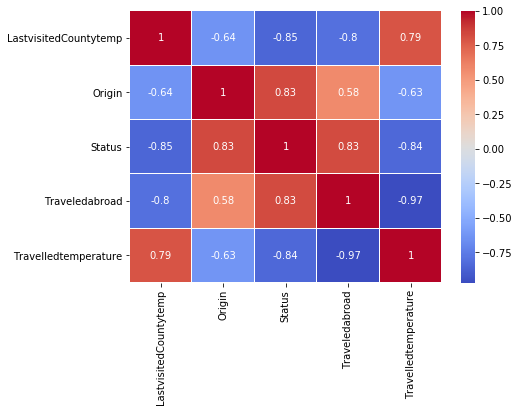

In [31]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [32]:
df_corr = data.loc[:,cnames]
df_corr


,LastvisitedCountytemp,Origin,Status,Traveledabroad,Travelledtemperature
0,13,1,2,1,23
1,13,1,2,1,23
2,13,1,2,1,23
3,17,1,1,1,23
4,17,1,1,1,23
...,...,...,...,...,...
82,35,0,0,0,32
83,35,0,0,0,32
84,35,0,0,0,32
85,35,0,0,0,32


In [33]:
from sklearn.model_selection import train_test_split

predictors = data.drop("Status",axis=1)
Status = data["Status"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,Status,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 69 records and Testing features have 18 records.


In [34]:
X_train.shape

(69, 6)

In [35]:
X_test.shape

(18, 6)

In [36]:
Y_train.shape

(69,)

In [37]:
Y_test.shape

(18,)

In [38]:

from sklearn.metrics import accuracy_score

In [39]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [ ]:
#new predict

In [40]:
X1=data['Travelledtemperature'].values #indepenent
Y1=data['Status'].values


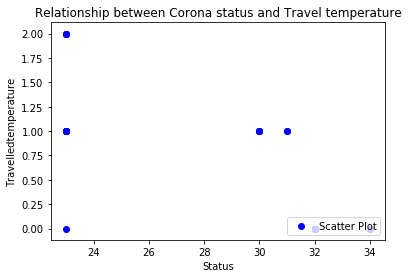

In [41]:
plt.scatter(X1,Y1,color='blue', label='Scatter Plot')
plt.title('Relationship between Corona status and Travel temperature')
plt.xlabel('Status')
plt.ylabel('Travelledtemperature')
plt.legend(loc=4)
plt.show()

In [42]:
print(X1.shape)
print(Y1.shape)

(87,)
(87,)


In [43]:
#reshape x1 and y1

X1=X1.reshape(-1,1)
Y1=Y1.reshape(-1,1)

In [44]:
#dimensions of X1 & Y1 after
print(X1.shape)
print(Y1.shape)

(87, 1)
(87, 1)


In [45]:
#split X1 and Y1 into training and test data sets

from sklearn.model_selection import train_test_split
X1_train,X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=0.33, random_state=42)

In [46]:
#dimen of xtrain etc.

print(X1_train.shape)
print(Y1_train.shape)
print(X1_test.shape)
print(Y1_test.shape)

(58, 1)
(58, 1)
(29, 1)
(29, 1)


In [47]:
# fit linear model

from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#train the model usng trainig sets

lm.fit(X1_train, Y1_train)

#predict on test data
Y1_pred=lm.predict(X1_test)

In [48]:
#model slope and intercept

a=lm.coef_
b=lm.intercept_,
print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)

Estimated model slope, a: [[-0.10256653]]
Estimated model intercept, b: (array([3.39528944]),)


In [49]:
#predicting status

lm.predict(X1)[0:10]


array([[1.0362593 ],
       [1.0362593 ],
       [1.0362593 ],
       [1.0362593 ],
       [1.0362593 ],
       [0.31829361],
       [0.31829361],
       [1.0362593 ],
       [1.0362593 ],
       [0.31829361]])

In [50]:
#rmse value
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(Y1_test, Y1_pred)
mae= mean_absolute_error(Y1_test, Y1_pred)
rmse = np.sqrt(mse)
print("mae value: {:.4f}".format(mae))
print("Rmse value: {:.4f}".format(rmse))
print("mse value: {:.4f}".format(mse))



mae value: 0.1661
Rmse value: 0.2930
mse value: 0.0858


In [51]:
# R_2 score

from sklearn.metrics import r2_score
print("R2 score :{:.4f}".format(r2_score(Y1_test, Y1_pred)))

R2 score :0.7180


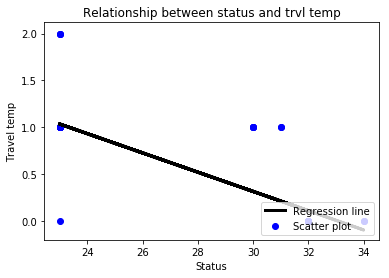

In [52]:
#plot regression line

plt.scatter(X1, Y1, color = 'blue', label='Scatter plot')
plt.plot(X1_test, Y1_pred, color='black', linewidth=3, label='Regression line')
plt.title('Relationship between status and trvl temp')
plt.xlabel('Status')
plt.ylabel('Travel temp')
plt.legend(loc=4)
plt.show()

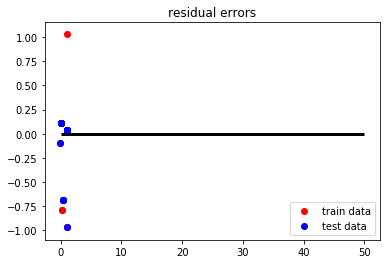

In [53]:
#plotting residual errors

plt.scatter(lm.predict(X1_train), lm.predict(X1_train) - Y1_train, color = 'red', label= 'train data')
plt.scatter(lm.predict(X1_test), lm.predict(X1_test) - Y1_test, color = 'blue', label= 'test data')

plt.hlines(xmin =0, xmax=50, y= 0, linewidth =3)
plt.title('residual errors')
plt.legend(loc=4)
plt.show()

In [54]:
#check overfit &under fit

print("Training set score:{:.4f}".format(lm.score(X1_train, Y1_train)))

print("Test set score : {:.4f}".format(lm.score(X1_test, Y1_test)))

Training set score:0.7009
Test set score : 0.7180


In [56]:
df=data

In [57]:
import statsmodels.api as sms

X = df.drop("Status",axis=1)
y = df["Status"]

# OLS(dependent,independent)
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Status   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              352.2
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    7.71e-56
Time:                        04:28:56   Log-Likelihood:                          33.416
No. Observations:                  87   AIC:                                     -54.83
Df Residuals:                      81   BIC:                                     -40.04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [58]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X1_train)
mse = mean_squared_error(Y1_train, predictions)
rmse = np.sqrt(mse)
rmse

NameError: name 'lin_reg' is not defined

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[2 1 1 1 0 1 1 1 0 0 1 2 1 0 2 1 1 0]


In [60]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.89 %


In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 100.00%
Test accuracy: 88.89%


In [62]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class= 'multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9444444444444444

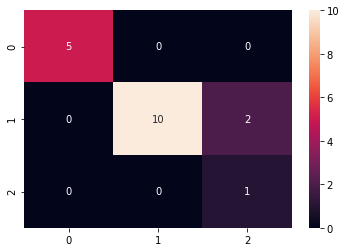

In [63]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

In [64]:
from sklearn.metrics import precision_score
#precision = precision_score(Y_test, y_pred_lr)
precision=precision_score(Y_test, y_pred_lr, pos_label='positive', average='micro')

print("Precision Score : ", precision_score(Y_test, y_pred_lr, pos_label='positive', average='micro'))


Precision Score :  0.8888888888888888


In [65]:
from sklearn.metrics import recall_score
#recall = recall_score(Y_test, y_pred_lr)
recall=recall_score(Y_test, y_pred_lr, pos_label='positive', average='micro')
print("Recall Score : ", recall_score(Y_test, y_pred_lr, pos_label='positive', average='micro'))

Recall Score :  0.8888888888888888


In [66]:
print((2*precision*recall)/(precision+recall))

0.8888888888888888


In [67]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1,2
Status,,,
0,5,0,0
1,0,10,2
2,0,0,1


In [68]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [69]:
fnr=FN*100/(FN+TP)
fnr
#falsenegative

0.0

In [ ]:
#Linear regression 

In [70]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
Y_test

In [ ]:
#new

In [ ]:
sns.jointplot(x="Status",y="Travelledtemperature",data=data,kind="reg")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[["Status"]]
X.head

In [ ]:
y = data[["Travelledtemperature"]]
y.head

In [ ]:
reg = LinearRegression()
model = reg.fit(X,y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

In [ ]:
# prediction
plt.figure(figsize=(12,6))
g = sns.regplot(x=data["Status"],y=data["Travelledtemperature"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("Status")
g.set_xlabel("Travelledtemperature")
plt.show()

In [ ]:
# model.intercep_ + model.coef_ * 1
model.predict([[1]])

In [ ]:
#Multiple linear regression

In [ ]:
df=data

In [ ]:
import statsmodels.api as sms

X = df.drop("Status",axis=1)
y = df["Status"]

# OLS(dependent,independent)
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

In [ ]:
#fitting a linear regression model using the training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

In [ ]:
some_data = X_train[:5]
some_labels = Y_train[:5]
print("Predictions: " ,lin_reg.predict(some_data))
print("Labels:",some_labels)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LinearRegression
model = train_model(X_train, Y_train, X_test, Y_test, LinearRegression)

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
mse = mean_squared_error(Y_train, predictions)
rmse = np.sqrt(mse)
rmse

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

In [ ]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

In [ ]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Confusion matrix of randomforest

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

precision

In [ ]:
from sklearn.metrics import precision_score
#precision = precision_score(Y_test, y_pred_rf)

precision=precision_score(Y_test, y_pred_rf, pos_label='positive', average='micro')

print("Precision Score : ", precision_score(Y_test, y_pred_lr, pos_label='positive', average='micro'))


Recall of randomforest

In [ ]:
from sklearn.metrics import precision_score


recall=recall_score(Y_test, y_pred_rf, pos_label='positive', average='micro')

print("Precision Score : ", recall_score(Y_test, y_pred_lr, pos_label='positive', average='micro'))


fscore

In [ ]:
print((2*precision*recall)/(precision+recall))

In [ ]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
fnr=FN*100/(FN+TP)
fnr

Naviebayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

In [ ]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_nb)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)


In [ ]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

In [ ]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

In [ ]:
df = pd.read_csv('/kaggle/input/lastdata/covidprosker.csv')
df.head()

In [ ]:
conda install gaphviz


In [ ]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing